In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [4]:
library(ClusterR)
library(cluster)

Warning message:
"package 'ClusterR' was built under R version 3.6.3"Loading required package: gtools
Warning message:
"package 'gtools' was built under R version 3.6.3"Warning message:
"package 'cluster' was built under R version 3.6.3"

In [5]:
df= read.csv('Mutant.csv')
head(df)

ï..Patient.ID..,Sample.ID..,Tumor.type,AJCC.Stage,Mutation.identified.in.tumor.tissue.,Mutant.mean.allele.frequency....
CRC 456,CRC 456 PT1,Colorectum,I,"KRAS p.G13D, c.38G>A",25.44
CRC 457,CRC 457 PT1,Colorectum,II,"TP53 p.Q331Q, c.993G>A (Exon End)",28.97
CRC 457,CRC 457 PT1,Colorectum,II,"BRAF p.V600E, c.1799T>A",22.63
CRC 458,CRC 458 PT1,Colorectum,II,"TP53 p.R248Q, c.743G>A",51.94
CRC 459,CRC 459 PT1,Colorectum,II,"TP53 p.A276G, c.827C>G",52.19
CRC 460,CRC 460 PT1,Colorectum,II,"CTNNB1 p.S45F, c.134C>T",52.43


In [6]:
df <- setNames(df, c("Patient_ID","Sample_ID","Tumor_type","AJCC_Stage","Mutation_identified_in_tumor_tissue","Mutant_mean_allele_frequency"))

In [7]:
head(df)

Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Mutation_identified_in_tumor_tissue,Mutant_mean_allele_frequency
CRC 456,CRC 456 PT1,Colorectum,I,"KRAS p.G13D, c.38G>A",25.44
CRC 457,CRC 457 PT1,Colorectum,II,"TP53 p.Q331Q, c.993G>A (Exon End)",28.97
CRC 457,CRC 457 PT1,Colorectum,II,"BRAF p.V600E, c.1799T>A",22.63
CRC 458,CRC 458 PT1,Colorectum,II,"TP53 p.R248Q, c.743G>A",51.94
CRC 459,CRC 459 PT1,Colorectum,II,"TP53 p.A276G, c.827C>G",52.19
CRC 460,CRC 460 PT1,Colorectum,II,"CTNNB1 p.S45F, c.134C>T",52.43


In [8]:
df<-df %>% select(3,5)

In [9]:
head(df)

Tumor_type,Mutation_identified_in_tumor_tissue
Colorectum,"KRAS p.G13D, c.38G>A"
Colorectum,"TP53 p.Q331Q, c.993G>A (Exon End)"
Colorectum,"BRAF p.V600E, c.1799T>A"
Colorectum,"TP53 p.R248Q, c.743G>A"
Colorectum,"TP53 p.A276G, c.827C>G"
Colorectum,"CTNNB1 p.S45F, c.134C>T"


In [10]:
sum(is.na(df))

[1] 0

In [11]:
unique(df["Tumor_type"])

,Tumor_type
1,Colorectum
112,Lung
157,Breast
178,Pancreas
180,Ovary
181,Esophagus
182,Liver
187,Stomach


In [12]:
length(unique(df[,"Mutation_identified_in_tumor_tissue"]))

[1] 347

In [13]:
str(df)

'data.frame':	1024 obs. of  2 variables:
 $ Tumor_type                         : Factor w/ 8 levels "Breast","Colorectum",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Mutation_identified_in_tumor_tissue: Factor w/ 347 levels "AKT1 p.E17K, c.49G>A",..: 59 256 13 273 118 31 273 32 59 37 ...


In [14]:
df$Tumor_type<-as.numeric(factor(df$Tumor_type))
unique(df$Tumor_type)

[1] 2 5 1 7 6 3 4 8

In [15]:
df$Mutation_identified_in_tumor_tissue<-as.numeric(factor(df$Mutation_identified_in_tumor_tissue))

In [16]:
head(df)

Tumor_type,Mutation_identified_in_tumor_tissue
2,59
2,256
2,13
2,273
2,118
2,31


In [17]:
df[,2] = scale(df[,2])
df

Tumor_type,Mutation_identified_in_tumor_tissue
2,-0.8095580
2,1.0572105
2,-1.2454531
2,1.2183022
2,-0.2504750
2,-1.0748855
2,1.2183022
2,-1.0654095
2,-0.8095580
2,-1.0180296


In [18]:
set.seed(240) # Setting seed
kmeans.re <- kmeans(df[,2], centers = 3)
kmeans.re

# Cluster identification for
# each observation
kmeans.re$cluster

K-means clustering with 3 clusters of sizes 313, 529, 182

Cluster means:
        [,1]
1  1.3199041
2 -0.8622401
3  0.2362364

Clustering vector:
   [1] 2 1 2 1 3 2 1 2 2 2 3 1 3 1 2 2 3 1 2 2 2 1 2 2 1 2 1 2 2 1 1 3 2 2 2 3 1
  [38] 2 2 2 1 2 2 2 2 1 2 2 2 3 1 2 1 2 2 1 2 1 2 2 2 3 3 2 1 2 1 1 2 2 1 2 2 2
  [75] 2 2 2 2 1 2 3 2 2 3 2 1 3 1 2 2 1 2 2 1 1 2 2 3 2 2 3 1 2 2 2 2 2 2 1 2 2
 [112] 1 1 1 2 1 3 3 2 2 3 1 2 1 1 3 2 2 1 3 2 1 1 2 1 3 2 1 1 2 2 2 2 2 2 2 3 3
 [149] 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 3 2 1 2 1 3 2 2 2 1 2 1 2 1 1 1 2 2 3
 [186] 1 1 1 3 1 2 3 3 1 1 2 2 2 2 2 3 2 1 1 1 2 2 3 1 2 2 1 1 2 1 1 1 1 1 3 1 2
 [223] 2 1 1 2 3 3 3 2 2 2 1 2 1 2 3 2 3 3 2 2 2 2 1 1 3 2 2 1 2 2 2 1 2 1 2 1 1
 [260] 2 1 2 1 1 1 2 2 1 2 3 2 2 1 2 1 2 2 2 1 2 2 2 1 2 3 3 2 3 1 1 3 1 2 1 1 3
 [297] 2 1 3 1 1 2 1 1 3 2 2 2 3 2 2 1 1 1 2 2 1 2 2 3 1 3 3 1 2 1 2 2 1 2 2 2 2
 [334] 3 2 2 1 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 2 3 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 [371] 2 2 3 2 1 2 3 2 2 2 1 2 3 2 3 2 3 2 3

[1] 2 1 2 1 3 2 1 2 2 2 3 1 3 1 2 2 3 1 2 2 2 1 2 2 1 2 1 2 2 1 1 3 2 2 2 3 1
  [38] 2 2 2 1 2 2 2 2 1 2 2 2 3 1 2 1 2 2 1 2 1 2 2 2 3 3 2 1 2 1 1 2 2 1 2 2 2
  [75] 2 2 2 2 1 2 3 2 2 3 2 1 3 1 2 2 1 2 2 1 1 2 2 3 2 2 3 1 2 2 2 2 2 2 1 2 2
 [112] 1 1 1 2 1 3 3 2 2 3 1 2 1 1 3 2 2 1 3 2 1 1 2 1 3 2 1 1 2 2 2 2 2 2 2 3 3
 [149] 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 3 2 1 2 1 3 2 2 2 1 2 1 2 1 1 1 2 2 3
 [186] 1 1 1 3 1 2 3 3 1 1 2 2 2 2 2 3 2 1 1 1 2 2 3 1 2 2 1 1 2 1 1 1 1 1 3 1 2
 [223] 2 1 1 2 3 3 3 2 2 2 1 2 1 2 3 2 3 3 2 2 2 2 1 1 3 2 2 1 2 2 2 1 2 1 2 1 1
 [260] 2 1 2 1 1 1 2 2 1 2 3 2 2 1 2 1 2 2 2 1 2 2 2 1 2 3 3 2 3 1 1 3 1 2 1 1 3
 [297] 2 1 3 1 1 2 1 1 3 2 2 2 3 2 2 1 1 1 2 2 1 2 2 3 1 3 3 1 2 1 2 2 1 2 2 2 2
 [334] 3 2 2 1 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 2 3 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 [371] 2 2 3 2 1 2 3 2 2 2 1 2 3 2 3 2 3 2 3 1 1 2 1 2 2 3 2 1 1 1 2 1 1 2 2 1 2
 [408] 3 1 2 1 2 2 2 2 2 1 2 3 1 3 2 2 2 3 1 1 2 1 2 2 3 2 1 3 2 2 3 3 3 2 1 2 2
 [445] 2 2 2 1 1 2 1 2 2 2 2 1 2 2 2 1 3 1 2 2 3 1 1 2 3 1 2 1 2 2 3 2 2 3 1 2 2
 [482] 3 2 2 3 2 2 2 2 2 2 2 1 2 2 2 1 2 2 3 2 2 1 2 1 1 2 3 1 1 2 2 1 1 2 3 2 1
 [519] 1 1 2 2 2 3 2 1 2 3 2 3 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 2 1 2 1 2 2 3 3 3 2
 [556] 1 2 3 2 3 3 2 1 1 3 2 3 3 2 1 2 2 3 3 2 3 1 2 1 3 1 1 2 1 3 2 1 1 3 2 1 2
 [593] 2 1 3 3 1 1 2 1 2 3 2 3 1 1 3 3 1 1 1 2 1 2 2 1 3 2 1 1 2 3 3 2 1 2 2 2 1
 [630] 1 2 1 2 1 2 3 3 2 2 1 2 2 3 2 3 3 2 1 3 1 2 2 1 2 1 2 2 2 1 3 2 3 1 2 3 1
 [667] 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 1 2 2 2 1 3 3 1 3 2 1 3 3 2 2
 [704] 1 2 3 2 2 2 1 1 2 1 3 2 2 1 1 2 1 3 1 2 1 3 2 1 1 2 1 2 2 3 1 2 2 2 3 1 3
 [741] 1 2 1 2 3 3 2 2 2 1 3 2 1 2 3 2 2 2 2 2 1 1 3 2 3 1 3 2 1 3 2 1 1 2 2 2 2
 [778] 1 2 1 2 2 2 2 1 3 2 1 1 1 3 2 2 1 2 2 1 1 2 2 3 2 2 3 2 3 2 2 2 1 1 2 1 2
 [815] 2 2 3 2 2 3 2 2 2 3 2 3 3 2 2 2 2 2 2 2 2 2 1 2 3 1 2 1 3 2 1 2 2 3 2 3 1
 [852] 2 1 1 1 3 1 2 2 3 3 1 2 3 2 2 2 2 2 3 1 2 3 2 2 2 2 3 2 1 2 3 3 2 3 1 2 1
 [889] 2 1 2 2 3 2 2 1 1 2 2 2 1 3 2 1 2 1 2 2 2 1 3 2 1 3 2 2 2 3 1 2 2 2 1 2 2
 [926] 1 2 2 3 2 2 2 1 2 1 2 2 2 2 3 2 2 2 1 1 1 1 1 2 2 2 3 1 2 3 2 2 1 3 2 3 2
 [963] 1 2 2 2 3 1 1 1 2 3 2 2 2 1 1 2 2 1 1 3 3 1 1 3 1 1 1 1 1 2 2 3 1 1 3 3 3
[1000] 2 2 3 2 2 1 2 2 1 2 3 2 1 2 2 1 1 2 2 1 2 1 2 2 2

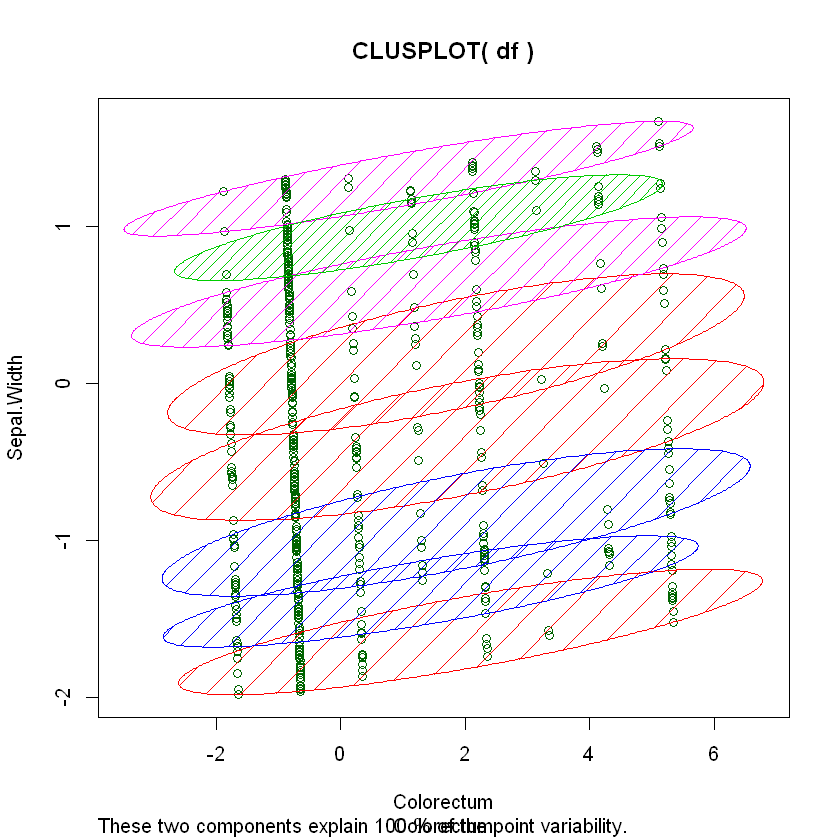

In [119]:
## Visualizing clusters
y_kmeans <- kmeans.re$cluster
clusplot(df,
y_kmeans,
lines = 0,
shade = TRUE,
color = TRUE,
plotchar = FALSE,
span = TRUE,
xlab = df$Tumor_type,
ylab = 'Sepal.Width')

In [107]:
df

Tumor_type,Mutation_identified_in_tumor_tissue
Colorectum,-0.8095580
Colorectum,1.0572105
Colorectum,-1.2454531
Colorectum,1.2183022
Colorectum,-0.2504750
Colorectum,-1.0748855
Colorectum,1.2183022
Colorectum,-1.0654095
Colorectum,-0.8095580
Colorectum,-1.0180296


[1] 1 2 1 2 3 1 2 1 1 1 3 2 2 2 1 1 3 2 1 1 1 2 1 1 2 1 2 1 1 2 2 3 1 1 1 3 2
  [38] 1 1 1 2 1 1 1 1 2 1 1 1 3 2 1 2 1 1 2 1 2 1 1 1 3 3 1 2 1 2 2 1 1 2 1 1 1
  [75] 1 1 1 1 2 1 3 1 1 3 1 2 3 2 1 1 2 1 1 2 2 1 1 3 1 1 3 2 1 1 1 1 1 1 2 1 1
 [112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 1 2 2 1 2 3 1 2 2 1 1 1 1 1 1 1 3 3
 [149] 1 2 1 1 1 2 2 2 5 5 3 5 3 5 5 5 5 5 3 5 3 5 3 3 5 5 5 3 5 6 7 6 2 2 4 4 4
 [186] 2 6 6 6 2 1 3 7 2 2 1 7 1 1 1 3 1 2 2 2 1 1 3 2 1 1 6 2 1 2 2 2 6 6 2 2 3
 [223] 1 6 6 4 2 7 6 1 1 1 2 1 2 1 3 1 2 6 1 1 1 1 2 2 6 7 7 6 7 1 1 6 7 6 1 2 2
 [260] 1 2 1 2 6 2 1 1 6 1 3 7 1 2 1 2 1 1 1 6 7 1 1 2 7 6 3 1 6 6 6 3 6 1 2 2 4
 [297] 4 6 2 6 6 7 2 2 3 1 1 1 3 1 1 2 6 6 7 7 3 1 1 4 6 3 7 2 1 2 1 7 2 1 4 1 1
 [334] 3 1 1 2 1 4 1 1 1 4 2 2 2 7 4 4 6 2 1 1 3 1 1 1 4 1 1 2 1 1 1 2 1 1 4 2 1
 [371] 5 5 4 5 2 1 4 1 1 1 3 1 4 4 4 1 3 1 4 3 4 5 2 1 4 4 1 2 3 2 1 2 3 1 1 2 1
 [408] 3 2 1 2 1 4 1 1 1 2 5 3 2 3 5 5 7 6 6 6 1 2 1 1 3 4 4 3 1 1 4 4 3 1 2 1 1
 [445] 1 1 4 4 3 4 2 1 1 1 5 2 1 1 1 2 3 2 1 4 4 4 2 5 4 4 1 2 4 1 4 4 4 4 3 5 5
 [482] 3 5 4 3 1 7 4 5 4 4 4 4 4 1 1 2 1 1 3 1 1 2 4 3 4 4 3 2 4 4 4 4 2 1 3 1 2
 [519] 2 2 1 1 1 3 1 2 1 3 1 3 5 5 5 1 1 2 1 1 2 1 2 2 1 2 2 1 2 1 2 1 1 2 4 2 4
 [556] 3 5 3 1 3 3 5 2 2 2 5 3 3 1 2 1 1 4 2 5 3 2 5 2 2 2 2 1 2 3 1 2 3 3 1 2 1
 [593] 5 3 3 3 2 2 5 4 4 4 4 4 2 2 3 3 4 4 2 1 2 5 4 6 3 7 6 2 4 3 4 1 4 4 1 1 2
 [630] 2 1 2 1 3 4 4 7 7 7 4 4 7 4 1 3 3 1 2 3 4 4 4 6 5 4 1 1 1 2 3 1 3 2 1 3 3
 [667] 1 2 1 3 5 1 1 1 5 1 1 1 1 1 1 1 3 5 5 1 3 1 2 1 1 1 2 4 2 2 3 5 3 3 3 5 1
 [704] 2 4 3 5 1 1 2 2 1 3 3 5 5 3 2 1 3 3 2 1 2 3 1 2 3 5 2 1 1 3 2 1 1 1 3 3 3
 [741] 2 1 2 1 3 3 1 1 1 2 3 5 2 1 3 1 1 4 5 5 3 2 3 5 3 2 3 5 2 3 1 2 2 1 1 1 5
 [778] 2 1 2 1 1 1 5 2 4 4 3 3 2 3 4 5 4 4 1 2 2 1 1 3 1 1 3 1 3 7 7 4 4 2 1 4 1
 [815] 1 1 4 4 4 7 7 4 5 4 1 4 4 4 5 1 1 1 1 1 1 1 3 5 3 3 1 6 3 1 2 1 1 3 1 3 2
 [852] 1 2 2 3 2 2 1 1 3 3 2 1 3 1 5 1 1 1 3 2 1 3 1 1 1 4 3 1 2 1 4 3 4 3 2 1 2
 [889] 1 2 1 1 4 1 1 2 6 4 7 7 2 3 1 2 1 2 7 7 7 2 6 5 3 3 1 1 1 3 3 5 1 1 2 1 1
 [926] 2 1 1 3 1 1 1 3 5 3 5 5 5 5 3 1 1 1 2 2 2 2 2 1 4 1 3 2 1 2 4 1 2 3 5 3 5
 [963] 2 4 5 5 2 2 2 2 5 3 5 5 5 3 3 5 5 3 3 3 3 2 2 2 2 2 2 2 2 5 5 6 6 6 6 2 2
[1000] 7 7 7 7 7 6 7 7 6 7 7 7 6 7 7 6 6 7 7 6 7 6 7 7 7

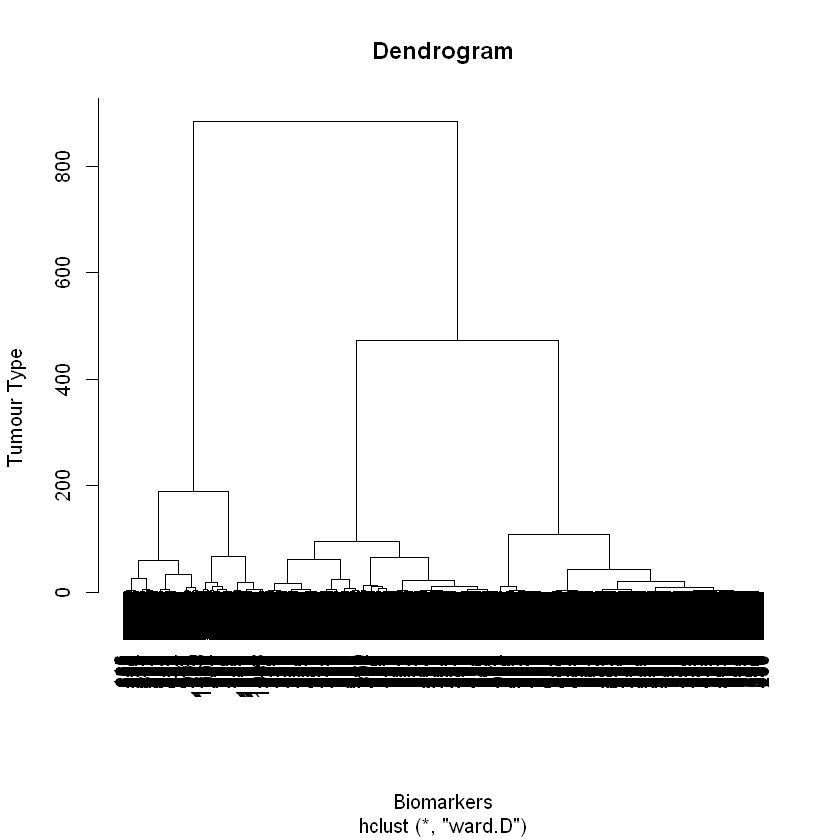

In [121]:
dendrogram = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendrogram'),
     xlab = 'Biomarkers',
     ylab = 'Tumour Type')

# Fitting Hierarchical Clustering to the dataset
hc = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 7)
y_hc

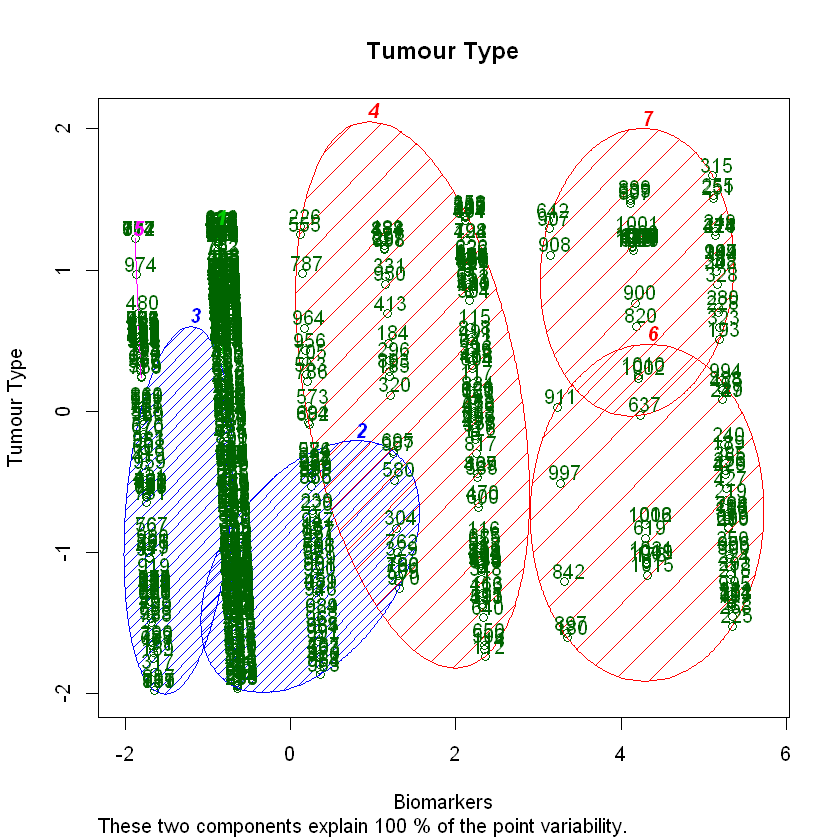

In [124]:
clusplot(df,
         y_hc,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels= 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Tumour Type'),
         xlab = 'Biomarkers',
         ylab = 'Tumour Type')

In [128]:
subset(df, Tumor_type = c(4,7,6))

Tumor_type,Mutation_identified_in_tumor_tissue
2,-0.8095580
2,1.0572105
2,-1.2454531
2,1.2183022
2,-0.2504750
2,-1.0748855
2,1.2183022
2,-1.0654095
2,-0.8095580
2,-1.0180296


In [130]:
df[df$Tumor_type == c(4,6,7), ]

Warning message in df$Tumor_type == c(4, 6, 7):
"longer object length is not a multiple of shorter object length"

,Tumor_type,Mutation_identified_in_tumor_tissue
184,4,-0.39261474
304,4,0.92454677
331,4,-0.86641384
580,4,0.58341142
618,7,-0.84746188
639,7,-1.17912125
766,4,1.25620615
790,4,1.25620615
807,7,-1.16016929
842,6,1.45520177


In [139]:
df[ df$Tumor_type == 7, ]

,Tumor_type,Mutation_identified_in_tumor_tissue
178,7,1.40782186
179,7,-0.82850992
487,7,-0.85693786
618,7,-0.84746188
619,7,1.21830222
637,7,0.34651186
638,7,-0.85693786
639,7,-1.17912125
807,7,-1.16016929
808,7,-0.82850992


In [140]:
df[ df$Tumor_type == 6, ]

,Tumor_type,Mutation_identified_in_tumor_tissue
180,6,1.8531930
642,6,-1.1127894
842,6,1.4552018
897,6,1.8247651
907,6,-1.0559335
908,6,-0.8664138
911,6,0.2138481
997,6,0.7539791


In [141]:
df[ df$Tumor_type == 4, ]

,Tumor_type,Mutation_identified_in_tumor_tissue
182,4,1.25620615
183,4,-1.14121732
184,4,-0.39261474
185,4,-0.15571519
296,4,-0.26942697
297,4,-1.06540947
304,4,0.92454677
320,4,-0.02305144
329,4,1.14249436
331,4,-0.86641384


In [178]:
count(df[ df$Tumor_type == 5, ])

n
97


In [191]:
count(df[ df$Tumor_type == c(8), ])

n
55


In [27]:
df1<-df[(df$Tumor_type==4 | df$Tumor_type==6 | df$Tumor_type==7),]
count(df1)
df1

n
73


,Tumor_type,Mutation_identified_in_tumor_tissue
178,7,1.40782186
179,7,-0.82850992
180,6,1.85319302
182,4,1.25620615
183,4,-1.14121732
184,4,-0.39261474
185,4,-0.15571519
296,4,-0.26942697
297,4,-1.06540947
304,4,0.92454677


In [28]:
set.seed(123) # Setting seed
kmeans.re <- kmeans(df1, centers = 3)
kmeans.re

K-means clustering with 3 clusters of sizes 32, 15, 26

Cluster means:
  Tumor_type Mutation_identified_in_tumor_tissue
1   6.906250                        -0.810742449
2   6.666667                         1.205667575
3   4.000000                        -0.001548247

Clustering vector:
 178  179  180  182  183  184  185  296  297  304  320  329  331  413  487  488 
   2    1    2    3    3    3    3    3    3    3    3    3    3    3    1    3 
 509  580  618  619  637  638  639  642  695  758  762  766  790  807  808  820 
   3    3    1    2    2    1    1    1    3    3    3    3    3    1    1    1 
 821  842  877  884  893  897  898  899  900  907  908  911  950  967  970  997 
   1    2    3    3    3    2    3    1    1    1    1    2    3    3    3    2 
1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 
   1    1    1    1    1    2    1    1    2    1    1    1    2    1    1    2 
1016 1017 1018 1019 1020 1021 1022 1023 1024 
   2    1    1    2

In [29]:
# Cluster identification for
# each observation
kmeans.re$cluster

178  179  180  182  183  184  185  296  297  304  320  329  331  413  487  488 
   2    1    2    3    3    3    3    3    3    3    3    3    3    3    1    3 
 509  580  618  619  637  638  639  642  695  758  762  766  790  807  808  820 
   3    3    1    2    2    1    1    1    3    3    3    3    3    1    1    1 
 821  842  877  884  893  897  898  899  900  907  908  911  950  967  970  997 
   1    2    3    3    3    2    3    1    1    1    1    2    3    3    3    2 
1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 
   1    1    1    1    1    2    1    1    2    1    1    1    2    1    1    2 
1016 1017 1018 1019 1020 1021 1022 1023 1024 
   2    1    1    2    1    2    1    1    1

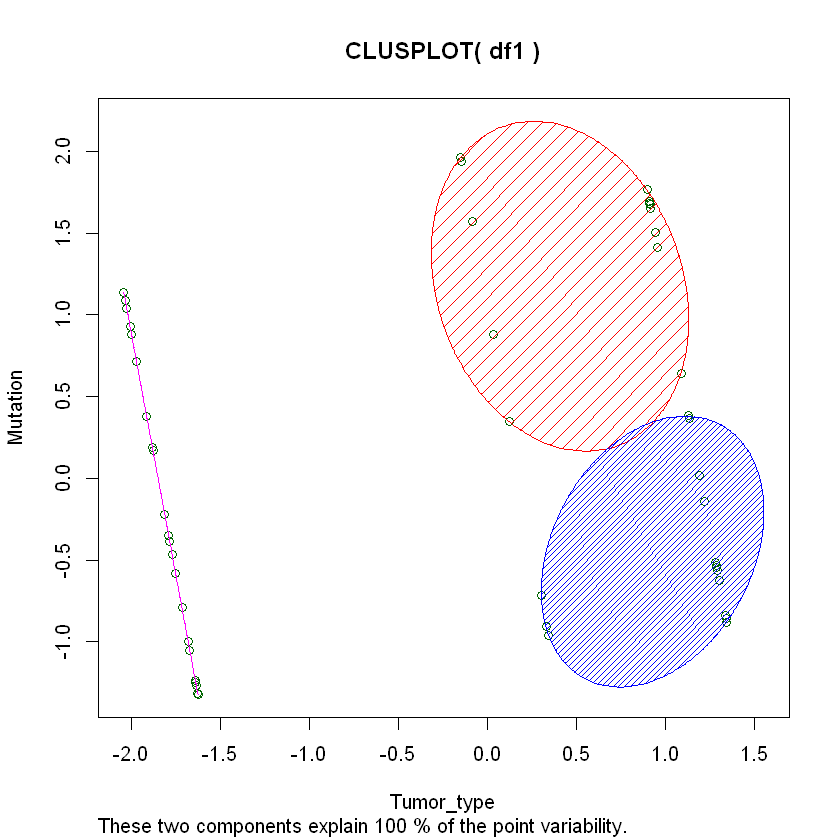

In [30]:

## Visualizing clusters
y_kmeans <- kmeans.re$cluster
clusplot(df1,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         plotchar = FALSE,
         span = TRUE,
         xlab = 'Tumor_type',
         ylab = 'Mutation')